# Example code snippets
This notebook contains code snippets for the following statistical techniques:
- [linear regression](#Linear-regression)
- [curve fitting](#Curve-fitting)
- [clustering](#Clustering)
    - [K-means clustering](#K-means-clustering)
    - [Agglomerative hierarchical clustering](#Agglomerative-hierarchical-clustering)
- [A/B Testing](#A-/-B-testing)
    - [One sample t-test](#One-sample-t-test)
    - [Two sample t-test](#Two-sample-t-test)
    - [Paired t-test](#Paired-t-test)
    - [Analysis of variance (ANOVA)](#Analysis-of-Variance-(ANOVA)
    - [KS test](#KS-test)
    - [Shapiro test](#Shapiro-test)
    - [Anderson-Darling test](#Anderson-Darling-test)
    - [Mood’s Median test](#Mood's-median-test)
    - [Kruskall Wallis test](#Kruskall-Wallis test)
    - [Bartlett’s test for variances](#Bartlett's-test-for-variances)
    - [Levene’s test for variances](#Levene’s-test-for-variances)
- Correlation
- Regression
- Heat Maps
- Time Series Analysis
- Traditional
- Network Analysis
- Spatial Data Analysis

## Linear regression

In [5]:
# Load the data
from sklearn import datasets
data = datasets.load_boston()

# Load linear regression model
from sklearn.linear_model import LinearRegression

# Load numpy and pandas
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

X = df # X are the features you want to train on
y = target["MEDV"] # y is the feature you want to predict

# Fit the model
lm = LinearRegression()
model = lm.fit(X,y)

# Predict
predictions = lm.predict(X)

# The R2 score
lm.score(X,y)

# The intercept score
lm.intercept_

36.4911032803614

## Curve fitting

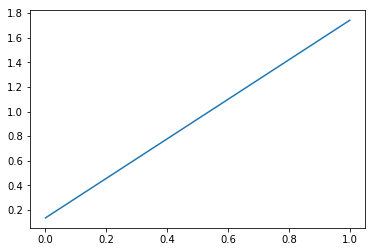

In [24]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Create two separate arrays containing x and y values.
x = np.array([1, 2, 3, 9])
y = np.array([1, 4, 1, 3])

# Curve_fit also requires a function that provides the type of fit you would like. 
# For instance, a linear fit would use a function like
def curve_fit_function(x, a, b):
    return a * x + b

# scipy.optimize.curve_fit(func, x, y) will return a numpy array containing two arrays: 
# the first will contain values for a and b that best fit your data, 
# and the second will be the covariance of the optimal fit parameters.
params = curve_fit(curve_fit_function, x, y)

[a, b] = params[0]
plt.plot(params[0])

## Clustering

### K-means clustering

[[-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]]


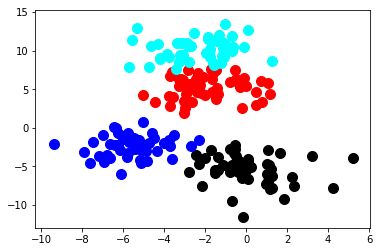

In [16]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# K-means is the most frequently used form of clustering due to its speed and simplicity.
from sklearn.cluster import KMeans

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create kmeans object
kmeans = KMeans(n_clusters=4)

# fit kmeans object to data
kmeans.fit(points)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

# save new clusters for chart
y_km = kmeans.fit_predict(points)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

### Agglomerative hierarchical clustering

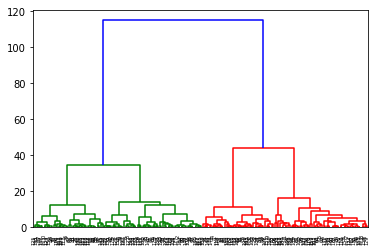

In [17]:
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(points)

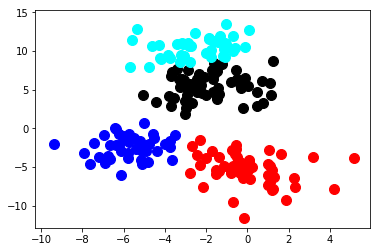

In [18]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')

## A / B testing
![ab test](./img/how-can-i-ab.png)

### One sample t-test

In [21]:
from scipy import stats

female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]
general_population_bps = 120

result = stats.ttest_1samp(female_doctor_bps, general_population_bps)
result.pvalue

0.00023838063630967753

### Two sample t-test

In [26]:
from scipy import stats

female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

male_consultant_bps = [118, 115, 112, 120, 124, 130, 123, 110, 120, 121,
                      123, 125, 129, 130, 112, 117, 119, 120, 123, 128]

result = stats.ttest_ind(female_doctor_bps, male_consultant_bps)
result.pvalue

0.0011571376404026158

### Paired t-test

In [27]:
from scipy import stats

control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]
treatment = [9.9, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]

result = stats.ttest_rel(control, treatment)
result.pvalue

0.0055329408161001415

### Analysis of Variance (ANOVA)

In [30]:
from scipy import stats

ctrl = [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14]
trt1 = [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69]
trt2 = [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]

result = stats.f_oneway(ctrl, trt1, trt2)
result.pvalue

0.0159099583256229

### KS test

### Shapiro test

### Anderson-Darling test

### Mood's median test

### Kruskal Wallis test

### Bartlett's test for variances

### Levene’s test for variances